In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import clear_output

In [25]:
%matplotlib tk

plt.figure(figsize=(15, 15))
grid = np.full([30, 30], 255).astype(np.uint8)
plt.imshow(grid, cmap="gray")
obstacle_size = 2
num_obstacles = 2

for _ in range(num_obstacles):
    loc = np.round(plt.ginput(1)[0]).astype(np.uint8)
    
    grid[loc[1]-obstacle_size:loc[1]+obstacle_size, 
         loc[0]-obstacle_size:loc[0]+obstacle_size] = 0
    
    plt.imshow(grid, cmap="gray")

start_coords = plt.ginput(1, show_clicks=False)[0]
plt.scatter(start_coords[0], start_coords[1], c = 'b')

goal_coords = plt.ginput(1, show_clicks=False)[0]
plt.scatter(goal_coords[0], goal_coords[1], c = 'r')

goal_loc = (int(goal_coords[1]), int(goal_coords[0]))
start_loc = (int(start_coords[1]), int(start_coords[0]))

plt.show()

In [26]:
print(f"{start_loc = }")
print(f"{goal_loc = }")

start_loc = (22, 4)
goal_loc = (16, 27)


In [27]:
class Node():
    def __init__(self, row:int, col:int, pred = None):
        self.loc = (row, col)
        self.predecessor = pred
        self.visited = False

    def __str__(self):
        return(f"loc : {self.loc}\n")

PATH FOUND!


[(16, 27),
 (15, 28),
 (15, 29),
 (16, 28),
 (17, 27),
 (18, 26),
 (19, 25),
 (20, 24),
 (21, 23),
 (22, 22),
 (23, 21),
 (22, 20),
 (23, 19),
 (22, 18),
 (23, 17),
 (24, 16),
 (25, 15),
 (26, 14),
 (27, 13),
 (28, 12),
 (29, 11),
 (29, 12),
 (28, 13),
 (27, 14),
 (26, 15),
 (25, 16),
 (24, 17),
 (23, 18),
 (22, 19),
 (21, 20),
 (20, 21),
 (19, 22),
 (18, 23),
 (17, 24),
 (16, 25),
 (15, 26),
 (14, 27),
 (13, 28),
 (13, 29),
 (14, 28),
 (15, 27),
 (16, 26),
 (17, 25),
 (18, 24),
 (19, 23),
 (20, 22),
 (21, 21),
 (20, 20),
 (21, 19),
 (20, 18),
 (21, 17),
 (22, 16),
 (23, 15),
 (24, 14),
 (25, 13),
 (26, 12),
 (27, 11),
 (28, 10),
 (29, 9),
 (29, 8),
 (28, 7),
 (29, 6),
 (29, 5),
 (28, 4),
 (29, 3),
 (29, 4),
 (28, 5),
 (27, 6),
 (26, 7),
 (25, 8),
 (24, 9),
 (23, 10),
 (22, 11),
 (21, 12),
 (20, 13),
 (19, 14),
 (18, 15),
 (17, 15),
 (18, 14),
 (19, 15),
 (20, 14),
 (21, 13),
 (22, 12),
 (23, 11),
 (24, 10),
 (25, 9),
 (26, 8),
 (27, 7),
 (28, 6),
 (29, 7),
 (28, 8),
 (27, 9),
 (26, 10

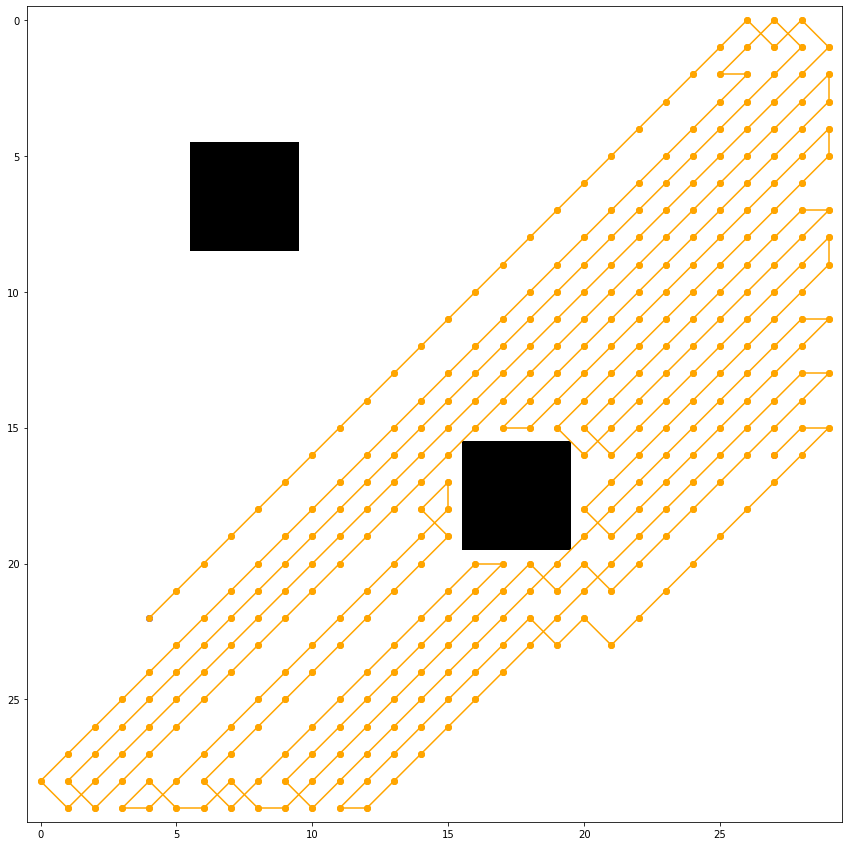

In [34]:
%matplotlib inline
class DFS():
    def __init__(self, grid:np.ndarray, start_loc:tuple[int, int], goal_loc:tuple[int, int]):
        self.grid = grid
        self.rows = grid.shape[0]
        self.cols = grid.shape[1]
        self.nodes = {}
        self.start_node = Node(*start_loc)
        self.goal_node = Node(*goal_loc)

        self.fig = plt.figure(figsize=(15, 15))
        self.ax = self.fig.add_subplot(111)
        self.ax.imshow(grid, cmap="gray")
        self.ax.scatter(start_loc[1], start_loc[0], c='b')
        self.ax.scatter(goal_loc[1], goal_loc[0], c='r')

    def get_neighbors(self, row, col):
        neighbors = []
        neighbors.append((row+1, col))
        neighbors.append((row-1, col))
        neighbors.append((row, col+1))
        neighbors.append((row, col-1))
        neighbors.append((row+1, col+1))
        neighbors.append((row-1, col-1))
        neighbors.append((row+1, col-1))
        neighbors.append((row-1, col+1))
    
        return list(filter(lambda n: not(n[0]<0 or n[1]<0 or n[0]>=self.rows or n[1]>=self.cols), neighbors))
    
    def recover_path(self):
        
        if self.goal_node.predecessor == None:
            print("PATH NOT FOUND!")
            return
        
        path = []
        curr_node = self.goal_node
        while curr_node.predecessor != None:
            path.append(curr_node.loc)
            self.ax.plot([curr_node.loc[1], curr_node.predecessor.loc[1]],
                         [curr_node.loc[0], curr_node.predecessor.loc[0]],  '-o', c='orange')
            curr_node = curr_node.predecessor

        return path
    
    def plot(self, new_node:Node):
        clear_output(wait=True)
        self.ax.scatter(new_node.loc[1], new_node.loc[0], c='g')
        # plt.show()

    def search(self):
        stack = deque()
        visited = deque()
        
        stack.appendleft(self.start_node)
        
        while stack:
            curr_node :Node = stack.popleft()
            visited.append(curr_node.loc)

            if curr_node.loc == self.goal_node.loc:
                print("PATH FOUND!")
                return self.recover_path()

            neighbors = self.get_neighbors(*curr_node.loc)

            for n_loc in neighbors:
                if n_loc not in visited and self.grid[n_loc]:
                    new_node = Node(*n_loc, pred=curr_node)
                    stack.appendleft(new_node)
                    if new_node.loc == self.goal_node.loc:
                        self.goal_node = new_node
            
            
dfs = DFS(grid, start_loc, goal_loc)           
dfs.search() 

In [27]:
s = deque()
s.appendleft(5)

while s:
    s.popleft()
    print(s)

deque([])
